<a href="https://colab.research.google.com/github/suhastumati/review-analysis-using-transformers/blob/main/Sentiment_Analysis_(Analysis_with_context).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
### Need to be installed before start...!!!


"""
!pip install nltk
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install transformers
!pip3 install torch torchvision #pytorch
"""

'\n!pip install nltk\n!pip install pandas\n!pip install numpy\n!pip install matplotlib\n!pip install seaborn\n!pip install transformers\n!pip3 install torch torchvision #pytorch\n'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import nltk
#nltk.download()
#This will download all data needed to run with nltk but it takes 3-4gb of your disk data. So install only required things.


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')



##To work with transformers
"""
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as se
"""


import matplotlib.pyplot as plt
import seaborn as se
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [6]:
# Read in data

#df = pd.read_csv('your - File path')
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')


df.shape


(568454, 10)

In [7]:
#too large so consider 500 reviews for as sample

df = df.tail(500)
df.shape

(500, 10)

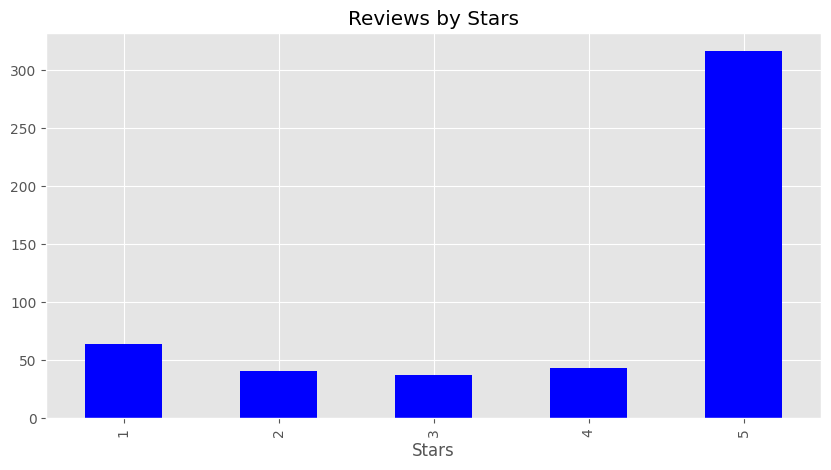

In [8]:
### Just for my analysis, bargraph of star ratings

ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Reviews by Stars',
          figsize=(10, 5),
          color='Blue')
ax.set_xlabel('Stars')
plt.show()

In [9]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
567954,567955,B0030VJ8YU,A2CW96MG1IB65L,Lola,0,0,2,1307404800,I wish my toddler liked it,I really wish my toddler liked this. It seems ...
567955,567956,B0030VJ8YU,A3P9MK4EKMA892,PeruMom,0,0,1,1306800000,Yuck!,I (and my little guy) have loved almost all ot...
567956,567957,B0030VJ8YU,A3MJNJLRCJWO9V,JessicaH,0,0,2,1305331200,Smells like cat food,I wanted this for the omega 3's but my daughte...
567957,567958,B0030VJ8YU,A2MF0C4E7GYCI,"VW ""VW""",0,0,5,1305331200,My son loves this,My son loves this food. He is 16 months now a...
567958,567959,B0030VJ8YU,A2MF0C4E7GYCI,"VW ""VW""",0,0,5,1305331200,My son loves this,My son loves this food. He is 16 months now a...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [10]:
##See how nltk is working
#import nltk
#nltk.download('punkt')
##No need to execute above command everytime

##Store 1 review in example variable

example = df['Text'][568449]
example

'Great for sesame chicken..this is a good if not better than resturants I have eaten at..My husband loved it..will find other recipes to use this in..'

In [11]:
tokens = nltk.word_tokenize(example)
tokens[:14]

['Great',
 'for',
 'sesame',
 'chicken',
 '..',
 'this',
 'is',
 'a',
 'good',
 'if',
 'not',
 'better',
 'than',
 'resturants']

In [12]:
##To see POS of review download "averaged_perceptron_tagger by using nltk.download('averaged_perceptron_tagger')
##POS Tagging in NLTK is a process to mark up the words in text format for a particular part of a speech based on its definition and context

#nltk.download('averaged_perceptron_tagger')
##No need to execute above command everytime

tagged = nltk.pos_tag(tokens)
tagged[:14]

[('Great', 'NNP'),
 ('for', 'IN'),
 ('sesame', 'NN'),
 ('chicken', 'NN'),
 ('..', 'NN'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('if', 'IN'),
 ('not', 'RB'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('resturants', 'NNS')]

In [13]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
##No need to execute above commands everytime

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Great/NNP)
  for/IN
  sesame/NN
  chicken/NN
  ../NN
  this/DT
  is/VBZ
  a/DT
  good/JJ
  if/IN
  not/RB
  better/JJR
  than/IN
  resturants/NNS
  I/PRP
  have/VBP
  eaten/VBN
  at/IN
  ../NNP
  My/NNP
  husband/NN
  loved/VBD
  it/PRP
  ../NNP
  will/MD
  find/VB
  other/JJ
  recipes/NNS
  to/TO
  use/VB
  this/DT
  in/IN
  ../NN)


In [14]:
###VADER Seniment Scoring

"""use NLTK's "SentimentIntensityAnalyzer" to get the neg/neu/pos scores of the text.
Stop words are removed
each word is scored and combined to a total score."""

#nltk.download('vader_lexicon')
##No need to execute above commands everytime


from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

smartie = SentimentIntensityAnalyzer()

In [15]:
smartie.polarity_scores('This is excellent product')

#compound is score from -ve to +ve

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [16]:
smartie.polarity_scores('I really hate this')

{'neg': 0.666, 'neu': 0.334, 'pos': 0.0, 'compound': -0.6115}

In [17]:
smartie.polarity_scores(example)

{'neg': 0.072, 'neu': 0.6, 'pos': 0.327, 'compound': 0.8589}

In [18]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = smartie.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [20]:
# Now we have sentiment score and metadata
vaders.tail()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
495,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
496,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
497,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
498,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
499,568454,0.000,0.846,0.154,0.4754,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


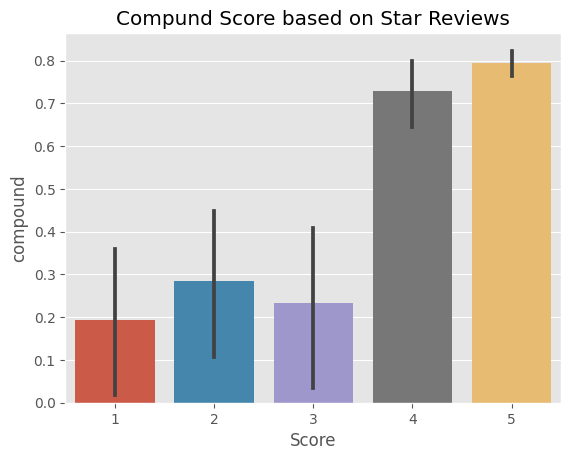

In [21]:
ax = se.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score based on Star Reviews')
plt.show()

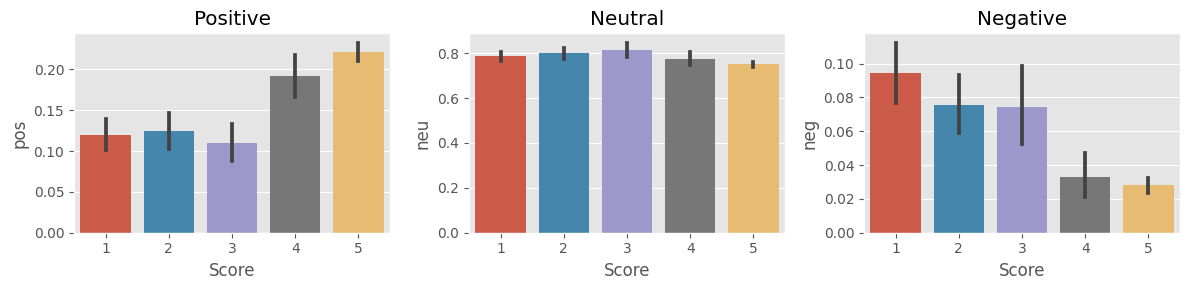

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
se.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
se.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
se.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [23]:
"""
Above model only worked with checking each word individually, But cannot identify the context of sentence
and cannot look into sarcastic positive sentences it may identify it as negative and mark as neg.
To overcome this type of problems we will use ""Roberta Pretrained Model""
"""

#Roberta Pretrained Model

"""Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words."""
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.0 MB/s eta 0:00:00


In [24]:
##This is pretrained model where we need not to train the model again and waste our time "distilbert-base-uncased-finetuned-sst-2-english"

#from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [25]:
# VADER results on example
print(example)
smartie.polarity_scores(example)

Great for sesame chicken..this is a good if not better than resturants I have eaten at..My husband loved it..will find other recipes to use this in..


{'neg': 0.072, 'neu': 0.6, 'pos': 0.327, 'compound': 0.8589}

In [26]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0032011122, 'roberta_neu': 0.01472838, 'roberta_pos': 0.98207057}


In [27]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = smartie.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 568091
Broke for id 568131
Broke for id 568158
Broke for id 568250


In [29]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [30]:
### Compare Scores between models
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

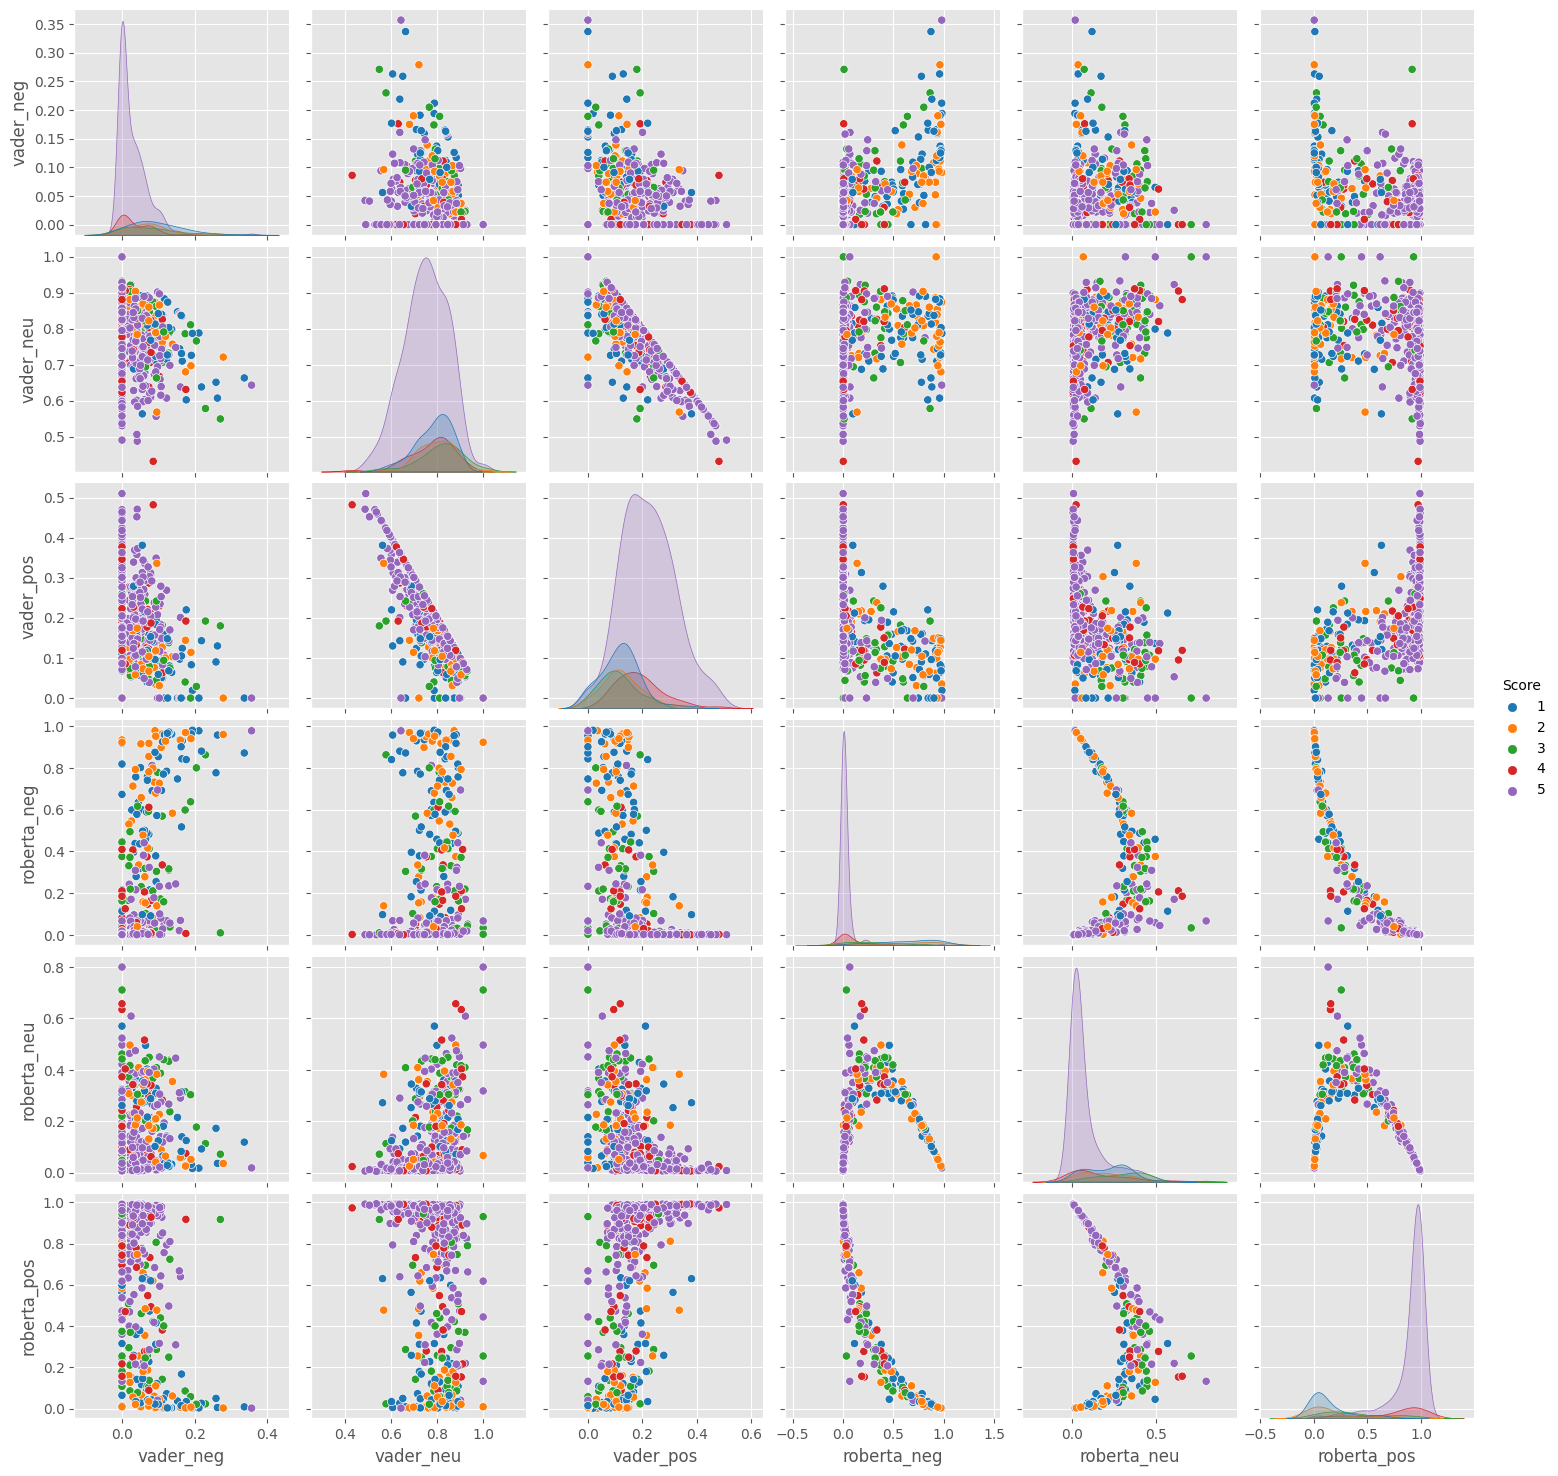

In [31]:
###Combine and compare
se.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [32]:
"""Review Examples:
Positive 1-Star and Negative 5-Star Reviews
Lets look at some examples where the model scoring and review score differ the most."""


results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I ordered this one and the salmon but I got two salmon instead. I bet this one would be good if I ever got it.'

In [33]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

"I used to use 3 sweet and low's...this one takes 6 packes! and even then it's not sweet but bitter! yak  Truvia is a lot better! I use 3 truvias..and that one is sweet and has no aftertaste like this stuff"

In [34]:
# nevative sentiment 5-Star view
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'Ordered coffee for a few months. Now I would not recommend it to my worst enemy. The coffee now has no aroma, is light brown and taste worse than ___________.  (fill in the blank)'

In [35]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'Ordered coffee for a few months. Now I would not recommend it to my worst enemy. The coffee now has no aroma, is light brown and taste worse than ___________.  (fill in the blank)'

In [36]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [37]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [49]:
sent_pipeline('the food taste like cardboard')

[{'label': 'NEGATIVE', 'score': 0.9995908141136169}]

In [39]:
### Note: This is sample work

######    TEST with your own example on both models

# sarcastic negative example.
example = "this food is good like cats food and taste is like cardboard"


# sarcastic positive-neutral example.
example_78 = "The food was fine, I guess. It didn't make me want to throw up, so that's always a fine."


# sample example
example_11 = "I want to commit sucide this week"
example_111 = 'i dont want to live anymore'
example_4 = 'i am happy good but i want to kill someone' #vader -ve

# VADER results on example
print(example_78)
print(smartie.polarity_scores(example_78))



# Run for Roberta Model
encoded_text = tokenizer(example_78, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

The food was fine, I guess. It didn't make me want to throw up, so that's always a fine.
{'neg': 0.065, 'neu': 0.744, 'pos': 0.191, 'compound': 0.3352}
{'roberta_neg': 0.037562188, 'roberta_neu': 0.23608328, 'roberta_pos': 0.7263546}
